Problem Statement 1:\
There is an automobile company Cars24X7 from India  which aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.\
They want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Japanese market.  Essentially, the company wants to know:\
Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered  a large dataset of different types of cars across the American market.\
Business Objectives:\
You as a Data scientist are required to apply some data science techniques  for the price of cars with the available independent variables.  That should help the management to understand how exactly the prices vary with the independent variables. \
 They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.\
 Also build the Random Forest Regressor for optimal search of classifiers.\
Dataset: data1.csv\
Note : kindly build the project with following pointers\
		1.Data understanding and exploration\
		2.Data cleaning\
		3.Data preparation\
		4.Model building and evaluation\
		5.Result with error calculation\

# Importing liberaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns=None

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Data

In [3]:
df=pd.read_csv("/content/drive/MyDrive/ML_test/data_1.csv")
df_copy=df.copy()
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Checking NULL Values

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# checking Duplicates

In [8]:
df.duplicated().sum()

2

In [9]:
df=df.drop_duplicates()

In [10]:
df.shape[0]

299

## Selling Price vs Year Line graph

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x1080 with 0 Axes>

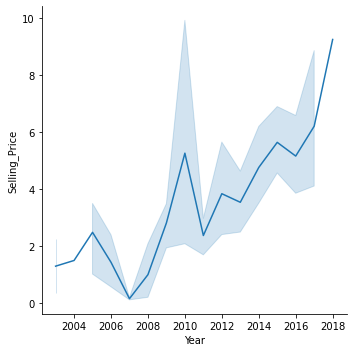

In [11]:
fig=plt.figure(figsize=(15,15))
sns.relplot('Year','Selling_Price', data=df, kind='line')

In [12]:
df['Selling_Price'].describe()

count    299.000000
mean       4.589632
std        4.984240
min        0.100000
25%        0.850000
50%        3.510000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

In [13]:
df['Present_Price'].describe()

count    299.000000
mean       7.541037
std        8.567887
min        0.320000
25%        1.200000
50%        6.100000
75%        9.840000
max       92.600000
Name: Present_Price, dtype: float64

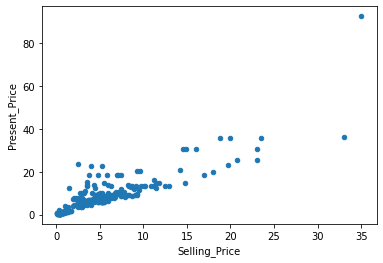

In [14]:
df.plot.scatter(x='Selling_Price', y='Present_Price')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


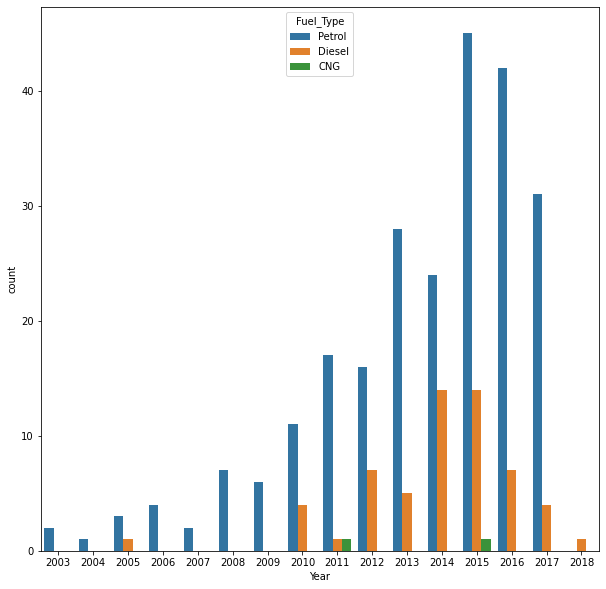

In [15]:
plt.figure(figsize=(10,10))
sns.countplot('Year',hue='Fuel_Type',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


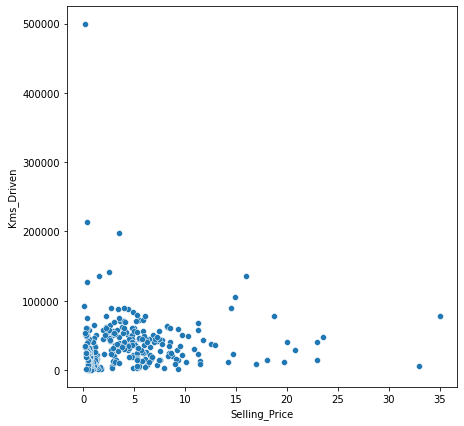

In [16]:
plt.figure(figsize=(7,7))
sns.scatterplot(df.Selling_Price,df.Kms_Driven)

<BarContainer object of 299 artists>

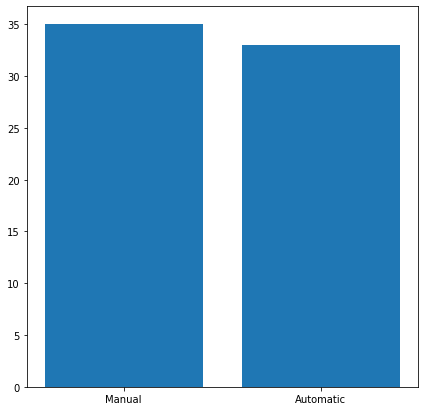

In [17]:
plt.figure(figsize=(7,7))
plt.bar(df.Transmission,df.Selling_Price)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


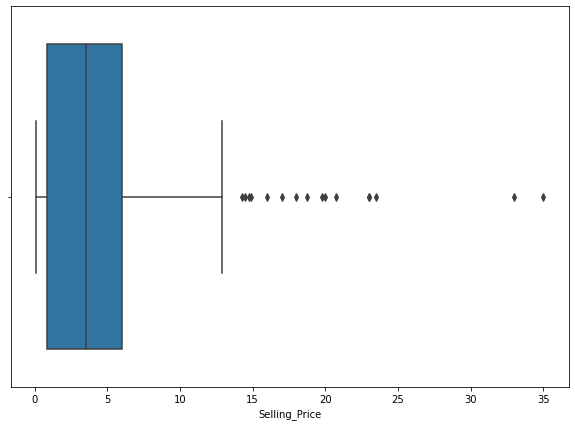

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(df.Selling_Price,data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


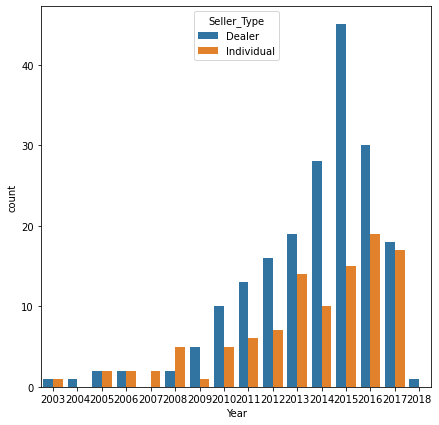

In [21]:
plt.figure(figsize=(7,7))
sns.countplot(df.Year,hue=df.Seller_Type,data=df)

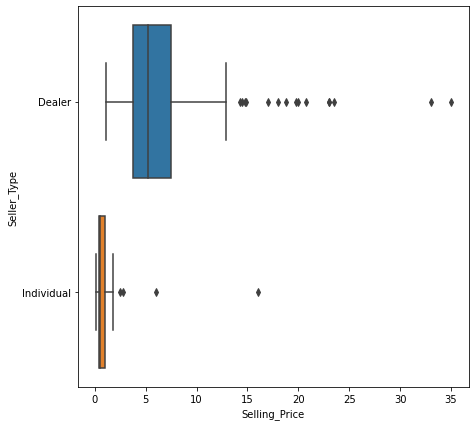

In [22]:
plt.figure(figsize=(7,7))
sns.boxplot(x=df.Selling_Price,y=df.Seller_Type,data=df)

In [23]:
df.drop(['Car_Name'],axis=1,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           299 non-null    int64  
 1   Selling_Price  299 non-null    float64
 2   Present_Price  299 non-null    float64
 3   Kms_Driven     299 non-null    int64  
 4   Fuel_Type      299 non-null    object 
 5   Seller_Type    299 non-null    object 
 6   Transmission   299 non-null    object 
 7   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 29.1+ KB


In [25]:
df['Year'].max()

2018

In [26]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [27]:
df['Current_Year']=2023
df['Years']=df.Current_Year - df.Year
df.drop(['Year','Current_Year'],axis=1,inplace=True)

In [28]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [29]:
df.select_dtypes('object').nunique()

Fuel_Type       3
Seller_Type     2
Transmission    2
dtype: int64

In [30]:
categorical_columns=['Fuel_Type','Seller_Type','Transmission']

In [31]:
for i in categorical_columns:
  print(f'{i}--->{df[i].unique()}')

Fuel_Type--->['Petrol' 'Diesel' 'CNG']
Seller_Type--->['Dealer' 'Individual']
Transmission--->['Manual' 'Automatic']


In [32]:

df=pd.get_dummies(df,drop_first=True)

In [33]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


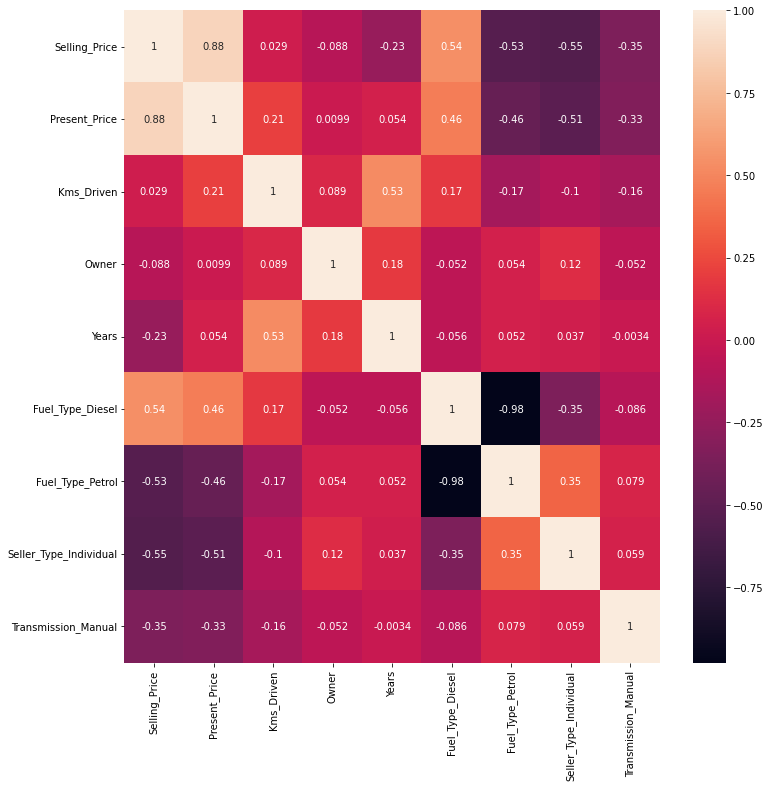

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [35]:
x=df.drop(['Selling_Price'],axis=1)

In [36]:
y=df['Selling_Price']

In [37]:
x.head()

,Present_Price,Kms_Driven,Owner,Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


In [38]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

# Model buidling

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [41]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

-1.3336416693581579

In [42]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

-1.9958001552716462